In [2]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [3]:
df = pd.read_csv('cyberbullying_tweets.csv')
df.head(5)

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [4]:
df['cyberbullying_type'].describe()

count        47692
unique           6
top       religion
freq          7998
Name: cyberbullying_type, dtype: object

In [5]:
df['cyberbullying_type'].value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

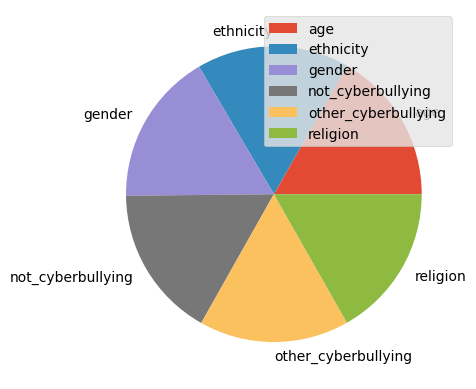

In [6]:
df.groupby('cyberbullying_type').size().plot(kind='pie')
plt.legend()

In [7]:
print('Number of Duplicates : ',df.duplicated().sum())

Number of Duplicates :  36


In [8]:
print('Shape before remove duplicates :',df.shape)
df=df.drop_duplicates()
print('Shape after  remove duplicates :',df.shape)

Shape before remove duplicates : (47692, 2)
Shape after  remove duplicates : (47656, 2)


In [9]:
import re
import string
import nltk 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
nltk.download('wordnet')
ps=PorterStemmer()
lem = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nikhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nikhi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
class tweets_prepocessing_df:
    def __init__(self,text):
        text = text.to_frame()
        self.text = text['tweet_text']
    
    def remove_emoji(self,text):
        emoji_pattern = re.compile("["
                                u"\U0001F600-\U0001F64F"  # emoticons
                                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                u"\U00002702-\U000027B0"
                                u"\U000024C2-\U0001F251"
                                "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', text)

    def remove_url(self,text):
        text = re.sub(r"(?:\@|https?\://)\S+", " ", text)
        text = re.sub(r'[^\x00-\x7f]',r'', text)
        banned_list = string.punctuation
        text = text.translate(str.maketrans(' ',' ',banned_list))
        return text

    def remove_mult_spaces(self,text):
        return re.sub("\s\s+" , " ", text)
    
    def remove_stopwords(self,text):
        clean_text = []
        for el in word_tokenize(text):
            if not el in stop_words:
                clean_text.append(el)
        return clean_text

    def decontract(self,text):
        text = text.replace('\r',' ').replace('\n',' ').lower()
        text = re.sub(r"won\'t", " will not", text)
        text = re.sub(r"won\'t've", " will not have", text)
        text = re.sub(r"can\'t", " can not", text)
        text = re.sub(r"don\'t", " do not", text)
        text = re.sub(r"can\'t've", " can not have", text)
        text = re.sub(r"ma\'am", " madam", text)
        text = re.sub(r"let\'s", " let us", text)
        text = re.sub(r"ain\'t", " am not", text)
        text = re.sub(r"shan\'t", " shall not", text)
        text = re.sub(r"sha\n't", " shall not", text)
        text = re.sub(r"o\'clock", " of the clock", text)
        text = re.sub(r"y\'all", " you all", text)

        text = re.sub(r"n\'t", " not", text)
        text = re.sub(r"n\'t've", " not have", text)
        text = re.sub(r"\'re", " are", text)
        text = re.sub(r"\'s", " is", text)
        text = re.sub(r"\'d", " would", text)
        text = re.sub(r"\'d've", " would have", text)
        text = re.sub(r"\'ll", " will", text)
        text = re.sub(r"\'ll've", " will have", text)
        text = re.sub(r"\'t", " not", text)
        text = re.sub(r"\'ve", " have", text)
        text = re.sub(r"\'m", " am", text)
        text = re.sub(r"\'re", " are", text)
        return text

    def filter_chars(self,text):
        sent = []
        for word in text.split(' '):
            if ('$' in word) | ('&' in word):
                sent.append('')
            else:
                sent.append(word)
        return ' '.join(sent)
    
    def clean_hashtags(self,text):
        text = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', text)) #remove last hashtags
        text = " ".join(word.strip() for word in re.split('#|_', text)) #remove hashtags symbol from words in the middle of the sentence
        return text

    def lemmatize(self,text):
        lemmatize_words = []
        for words in text:
            lemmatize_words.append(lem.lemmatize(words))
            # lemmatize_words.append(ps.stem(words))
        return lemmatize_words
    
    def clean_data(self):
       self.text = self.text.apply(self.decontract)
       self.text = self.text.apply(self.remove_emoji)
       self.text = self.text.apply(self.remove_url)
       self.text = self.text.apply(self.clean_hashtags)
       self.text = self.text.apply(self.filter_chars)
       self.text = self.text.apply(self.remove_mult_spaces)
       self.text = self.text.apply(self.remove_stopwords)
       self.text = self.text.apply(self.lemmatize)
       return self.text
    

In [11]:
text = 'In other words #katandandre, your food was crapilicious! #mkr",not_cyberbullying'
twp = tweets_prepocessing_df(df['tweet_text'])

In [12]:
df['clean_tweets'] = twp.clean_data()

Gender


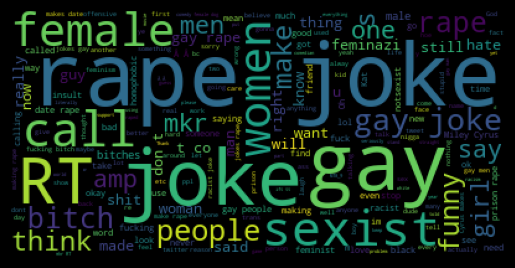

Ethnicity


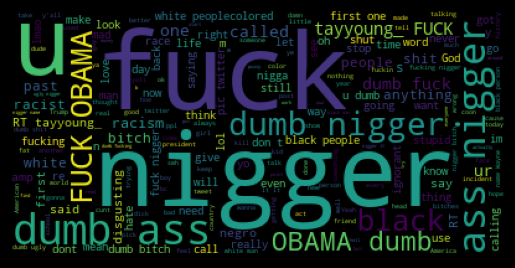

Religion


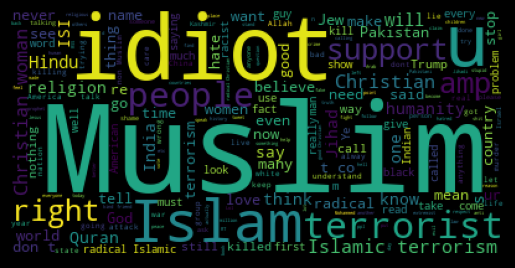

Age


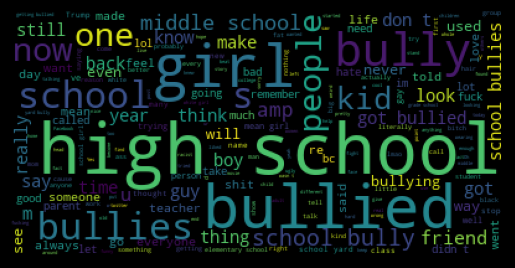

Other cyberbullying


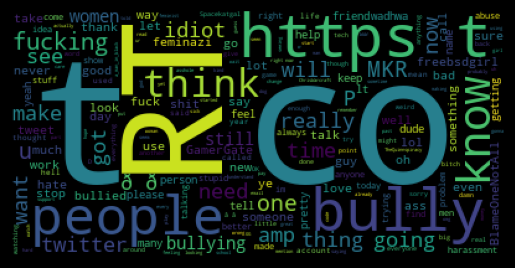

Non-bullying


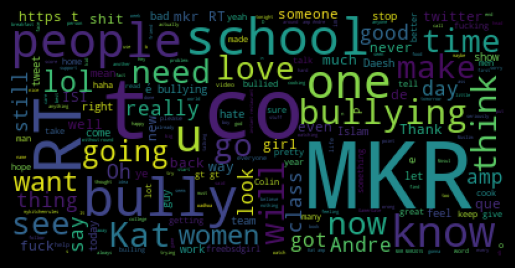

In [13]:

plt.figure(facecolor='black')
print("Gender")
text = " ".join(review for review in df[df.cyberbullying_type=='gender'].tweet_text.astype(str))
wordcloud = WordCloud(background_color='black',stopwords=STOPWORDS).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

plt.figure(facecolor='black')
print("Ethnicity")
text = " ".join(review for review in df[df.cyberbullying_type=='ethnicity'].tweet_text.astype(str))
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

plt.figure(facecolor='black')
print("Religion")
text = " ".join(review for review in df[df.cyberbullying_type=='religion'].tweet_text.astype(str))
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

plt.figure(facecolor='black')
print("Age")
text = " ".join(review for review in df[df.cyberbullying_type=='age'].tweet_text.astype(str))
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

plt.figure(facecolor='black')
print("Other cyberbullying")
text = " ".join(review for review in df[df.cyberbullying_type=='other_cyberbullying'].tweet_text.astype(str))
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

plt.figure(facecolor='black')
print("Non-bullying")
text = " ".join(review for review in df[df.cyberbullying_type=='not_cyberbullying'].tweet_text.astype(str))
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [14]:
df = df[df.cyberbullying_type!='other_cyberbullying']

In [15]:
from collections import Counter
vocab = Counter()

In [16]:
def add_to_vocab(words):
    global vocab
    vocab.update(words)

In [17]:

df['clean_tweets'].apply(add_to_vocab)
vocab_size = len(vocab)
print('Vocabulary size',vocab_size)

Vocabulary size 42238


In [18]:
vocab.most_common(50)

[('school', 9113),
 ('fuck', 5948),
 ('nigger', 5618),
 ('like', 5497),
 ('girl', 5482),
 ('joke', 5473),
 ('dumb', 5319),
 ('u', 5307),
 ('high', 5088),
 ('bully', 4777),
 ('muslim', 4758),
 ('people', 4474),
 ('bullied', 4471),
 ('gay', 4357),
 ('rape', 4241),
 ('one', 3494),
 ('rt', 3412),
 ('idiot', 3197),
 ('woman', 3010),
 ('black', 2843),
 ('get', 2734),
 ('as', 2641),
 ('bitch', 2422),
 ('amp', 2418),
 ('would', 2354),
 ('white', 2264),
 ('mkr', 2229),
 ('know', 2222),
 ('christian', 2152),
 ('right', 2106),
 ('say', 2078),
 ('make', 2066),
 ('think', 2048),
 ('call', 1813),
 ('go', 1696),
 ('got', 1654),
 ('im', 1631),
 ('dont', 1608),
 ('time', 1551),
 ('even', 1507),
 ('ur', 1470),
 ('want', 1446),
 ('terrorist', 1441),
 ('called', 1431),
 ('shit', 1414),
 ('never', 1392),
 ('see', 1384),
 ('fucking', 1308),
 ('islam', 1302),
 ('year', 1300)]

In [19]:
words = [key for key,val in vocab.items() if val>=3]
vocab_size = len(words)
print(vocab_size)
words

12161


['word',
 'katandandre',
 'food',
 'mkr',
 'white',
 'imacelebrityau',
 'today',
 'neighbour',
 'etc',
 'classy',
 'whore',
 'red',
 'velvet',
 'cupcake',
 'meh',
 'p',
 'thanks',
 'head',
 'concerned',
 'another',
 'angry',
 'dude',
 'twitter',
 'isi',
 'account',
 'pretending',
 'kurdish',
 'like',
 'islam',
 'lie',
 'yes',
 'test',
 'god',
 'good',
 'bad',
 'indifferent',
 'weird',
 'whatever',
 'prof',
 'existence',
 'itu',
 'sekolah',
 'ya',
 'bukan',
 'bully',
 'ga',
 'kaya',
 'karma',
 'hope',
 'bite',
 'kat',
 'butt',
 'nasty',
 'everything',
 'mostly',
 'priest',
 'rebecca',
 'black',
 'drop',
 'school',
 'due',
 'bullying',
 'flush',
 'ughhhh',
 'rt',
 'turkish',
 'state',
 'killed',
 'child',
 'last',
 '11',
 'year',
 'news',
 'love',
 'best',
 'response',
 'hotcake',
 'managed',
 'film',
 'de',
 'fazer',
 'comigo',
 'mim',
 'sofrendo',
 'bulling',
 'viu',
 'mimi',
 'basically',
 'letter',
 'generation',
 'pick',
 'line',
 'hi',
 'cute',
 'people',
 'call',
 'james',
 'potte

In [20]:
def remove_rare(text):
    global words
    for el in text:
        if not el in words:
            text.remove(el)
    return text

df['clean_tweets'] = df['clean_tweets'].apply(remove_rare)

# CNN Model

In [21]:
import tensorflow as tf
from numpy.random import seed
seed(1)
tf.random.set_seed(2)

In [22]:


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
enc = OrdinalEncoder()


In [23]:
X_train,X_test,y_train,y_test = train_test_split(df[['tweet_text','clean_tweets']],df['cyberbullying_type'],random_state=0,test_size=.3)

In [24]:
X_actual_test = X_test
y_actual_test = y_test

In [25]:
X_train_os,y_train_os = ros.fit_resample(np.array(X_train['clean_tweets']).reshape(-1,1),np.array(y_train).reshape(-1,1))
train_os = pd.DataFrame(list(zip([x[0] for x in X_train_os], y_train_os)), columns = ['lemmatized','cyberbullying_type']);

In [26]:
X_train_os = train_os['lemmatized']
y_train_os = train_os['cyberbullying_type']
X_train_os = X_train_os.to_frame()
y_train_os = y_train_os.to_frame()

In [27]:
X_test['clean_tweets']

7421     [course, going, stay, hate, therefore, rating,...
18342    [sir, salute, help, u, fight, islamic, terrori...
21184                                 [one, muslim, idiot]
15251             [rt, sexist, woman, jacket, look, weird]
15913    [female, really, know, know, ion, even, use, b...
                               ...                        
11029    [fuck, rape, joke, never, apologized, right, a...
37598    [daughter, went, school, even, went, 6th, form...
843                                   [make, drive, la, p]
37322    [girl, knew, high, school, bullied, high, scho...
31834                     [yes, bcuz, went, bully, school]
Name: clean_tweets, Length: 11950, dtype: object

In [28]:
vocab = Counter()
def add_to_vocab(words):
  global vocab
  vocab.update(words)
X_train_os['lemmatized'].apply(add_to_vocab)
df['clean_tweets'].apply(add_to_vocab)
vocab_size = len(vocab)
vocab_size

15797

In [29]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train_os['lemmatized'])
X_train_os = tokenizer.texts_to_sequences(X_train_os['lemmatized'])
X_test = tokenizer.texts_to_sequences(X_test['clean_tweets'])

In [30]:
max_size = len(max(df['clean_tweets'],key=lambda x:len(x)))
max_size

177

In [31]:
X_train_os = pad_sequences(X_train_os,maxlen=max_size,padding='post')
X_test = pad_sequences(X_test,maxlen=max_size,padding='post')

In [32]:
enc = OrdinalEncoder()
y_train_os,y_test = to_categorical(enc.fit_transform(X=y_train_os['cyberbullying_type'].to_frame()),num_classes=6),to_categorical(enc.fit_transform(X=y_test.to_frame()),num_classes=6)


In [32]:
from tensorflow.keras import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Embedding,Flatten,Dense,Conv1D,MaxPooling1D

In [33]:
def define_model(vocab_size,max_length):
    model = Sequential()
    model.add(Embedding(vocab_size, 100, input_length=max_length))
    model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(10, activation='relu',kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)))
    model.add(Dense(6, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [38]:
model_1 = define_model(vocab_size,max_size)
model_1.fit(X_train_os,y_train_os,epochs=20,verbose=2)

Epoch 1/20
874/874 - 6s - loss: 0.4624 - accuracy: 0.8274
Epoch 2/20
874/874 - 4s - loss: 0.1575 - accuracy: 0.9486
Epoch 3/20
874/874 - 4s - loss: 0.1018 - accuracy: 0.9684
Epoch 4/20
874/874 - 4s - loss: 0.0703 - accuracy: 0.9798
Epoch 5/20
874/874 - 4s - loss: 0.0508 - accuracy: 0.9857
Epoch 6/20
874/874 - 5s - loss: 0.0385 - accuracy: 0.9896
Epoch 7/20
874/874 - 4s - loss: 0.0322 - accuracy: 0.9922
Epoch 8/20
874/874 - 6s - loss: 0.0266 - accuracy: 0.9936
Epoch 9/20
874/874 - 8s - loss: 0.0233 - accuracy: 0.9945
Epoch 10/20
874/874 - 8s - loss: 0.0218 - accuracy: 0.9949
Epoch 11/20
874/874 - 9s - loss: 0.0186 - accuracy: 0.9952
Epoch 12/20
874/874 - 9s - loss: 0.0185 - accuracy: 0.9952
Epoch 13/20
874/874 - 8s - loss: 0.0165 - accuracy: 0.9957
Epoch 14/20
874/874 - 8s - loss: 0.0158 - accuracy: 0.9955
Epoch 15/20
874/874 - 8s - loss: 0.0156 - accuracy: 0.9956
Epoch 16/20
874/874 - 9s - loss: 0.0142 - accuracy: 0.9958
Epoch 17/20
874/874 - 8s - loss: 0.0153 - accuracy: 0.9955
Epoch 

In [40]:
results_os = model_1.evaluate(X_test, y_test)
results_os

374/374 [==============================] - 3s 8ms/step - loss: 0.5934 - accuracy: 0.8955


[0.5933659076690674, 0.8954811692237854]

In [ ]:
y_pred_model_1 = model_1.predict(X_test)
y_pred_model_1 =  np.argmax(y_pred_model_1, axis = 1)

result_model_1_df = pd.DataFrame({'Test text':X_actual_test['tweet_text'],'actual cyberbullying type':y_actual_test,'predicted cyberbullying type':y_pred_model_1})
cyberbullying_types = {0:'age',1:'ethnicity',2:'gender',3:"not_cyberbullying",4:'religion' }
result_model_1_df['predicted cyberbullying type'] = result_model_1_df['predicted cyberbullying type'].replace(cyberbullying_types)

In [ ]:
verify_model_1 = result_model_1_df[result_model_1_df['actual cyberbullying type'] != result_model_1_df['predicted cyberbullying type']]
# verify_model_2 = result_model_2_df[result_model_2_df['actual cyberbullying type'] != result_model_2_df['predicted cyberbullying type']]

In [ ]:
print('Number of Tweets that are correctly predicted by model 1 : ',result_model_1_df.shape[0]-verify_model_1.shape[0])
print('Number of Tweets that are wrongly predicted by model 1   : ',verify_model_1.shape[0])
print('------------------------------------------------------------------')
print('Total Number of tweets                                   : ',result_model_1_df.shape[0])

In [ ]:
def define_model_2(vocab_size,max_length):
    model = Sequential()
    model.add(Embedding(vocab_size, 100, input_length=max_length))
    model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=64, kernel_size=8, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(10, activation='relu',kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)))
    model.add(Dense(6, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
model_2 = define_model_2(vocab_size,max_size)
model_2.fit(X_train_os,y_train_os,epochs=20,verbose=2)

In [ ]:
results_2 = model_2.evaluate(X_test, y_test)
results_2

In [ ]:
def define_model_3(vocab_size,max_length):
    model = Sequential()
    model.add(Embedding(vocab_size, 100, input_length=max_length))
    model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=64, kernel_size=8, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=128, kernel_size=8, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(10, activation='relu',kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)))
    model.add(Dense(6, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
model_3 = define_model_3(vocab_size,max_size)
model_3.fit(X_train_os,y_train_os,epochs=35,verbose=2)

In [ ]:
results_3 = model_3.evaluate(X_test, y_test)
results_3

In [ ]:
y_pred_model_3 = model_3.predict(X_test)
y_pred_model_3_srg =  np.argmax(y_pred_model_3, axis = 1)

result_model_3_df = pd.DataFrame({'Test text':X_actual_test['tweet_text'],'actual cyberbullying type':y_actual_test,'predicted cyberbullying type':y_pred_model_3_srg})
cyberbullying_types = {0:'age',1:'ethnicity',2:'gender',3:"not_cyberbullying",4:'religion' }
result_model_3_df['predicted cyberbullying type'] = result_model_3_df['predicted cyberbullying type'].replace(cyberbullying_types)

In [4]:
from tensorflow.keras.models import load_model
loaded_saved_model = load_model('cyber_bullying_model_3_13-4-23(90.7029%).h5')

In [5]:
loaded_saved_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 177, 100)          1579700   
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 170, 32)           25632     
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 85, 32)            0         
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 78, 64)            16448     
_________________________________________________________________
max_pooling1d_14 (MaxPooling (None, 39, 64)            0         
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 32, 128)           65664     
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 16, 128)          

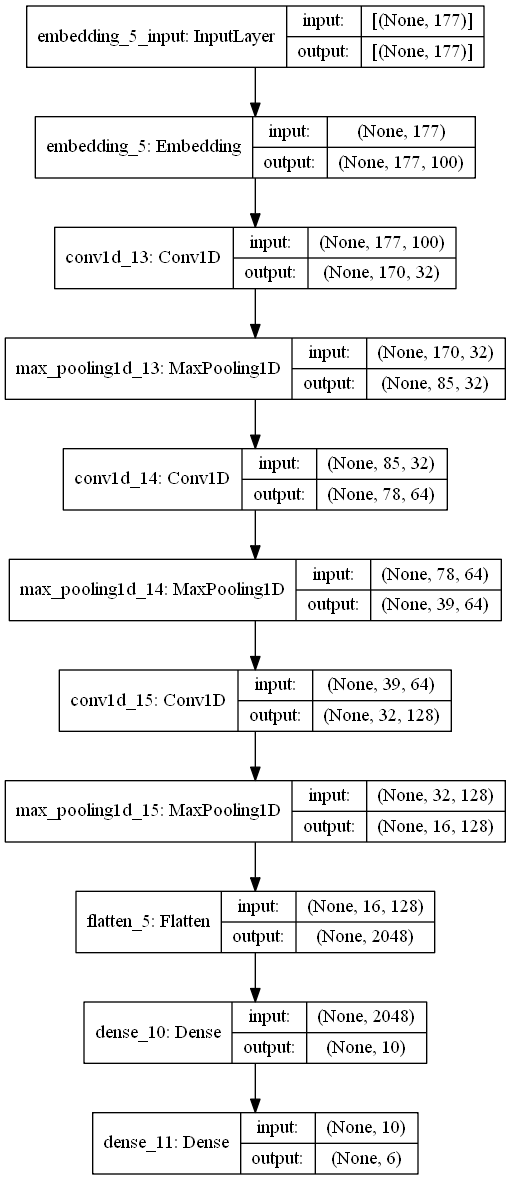

In [29]:
import tensorflow as tf
tf.keras.utils.plot_model(
    loaded_saved_model,
    to_file='model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
)



In [41]:
import tensorflow as tf
from numpy.random import seed
seed(1)
tf.random.set_seed(2)
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model

saved_model = load_model('cyber_bullying_model_3_13-4-23(90.7029%).h5')
saved_model

In [42]:
X_train_os = pd.DataFrame(X_train_os)

In [43]:
saved_model.evaluate(X_test,y_test)

374/374 [==============================] - 7s 14ms/step - loss: 1.1897 - accuracy: 0.9070


[1.1897374391555786, 0.9070292711257935]

In [56]:
y_pred_saved = saved_model.predict(X_test)
y_pred = np.argmax(y_pred_saved, axis = 1)


In [106]:
y_pred_type=[]

for var in y_pred:
    if(var == 0):
        y_pred_type.append('age')
    if(var == 1):
        y_pred_type.append('ethnicity')
    if(var == 2):
        y_pred_type.append('gender')
    if(var == 3):
        y_pred_type.append('not_cyberbullying')
    if(var == 4):
        y_pred_type.append('religion')


In [109]:
from sklearn.metrics import confusion_matrix,classification_report

def conf_matrix(y, y_pred, title, labels):
    fig, ax = plt.subplots(figsize=(6.5,5))
    ax=sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap="Purples", fmt='g', cbar=False, annot_kws={"size":30})
    plt.title(title, fontsize=25)
    ax.xaxis.set_ticklabels(labels) 
    ax.yaxis.set_ticklabels(labels)
    ax.set_ylabel('Test', fontsize=15)
    ax.set_xlabel('Predicted', fontsize=15)
    plt.show()  

In [111]:

print(classification_report(y_actual_test,y_pred_type))

                   precision    recall  f1-score   support

              age       0.98      0.94      0.96      2399
        ethnicity       0.97      0.97      0.97      2366
           gender       0.88      0.84      0.86      2371
not_cyberbullying       0.77      0.85      0.81      2375
         religion       0.94      0.93      0.94      2439

         accuracy                           0.91     11950
        macro avg       0.91      0.91      0.91     11950
     weighted avg       0.91      0.91      0.91     11950



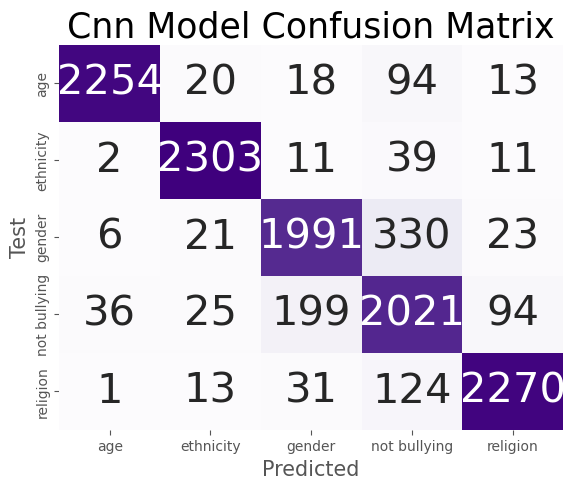

In [105]:
sentiments = ["age","ethnicity","gender","not bullying","religion"]
conf_matrix(y_actual_test,y_pred_type,"Cnn Model Confusion Matrix",sentiments)